In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
#INDEPENDENT FEAYURES
x = pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [16]:
#DEPENDENT FEATURES
y = iris['target']

In [17]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
# Apply decession tree classifire
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()

In [30]:
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3181818181818182, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2727272727272727, 0.8571428571428572, 'True  '),
 Text(0.4090909090909091, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.36363636363636365, 0.8571428571428572, '  False'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.48\nsamples = 

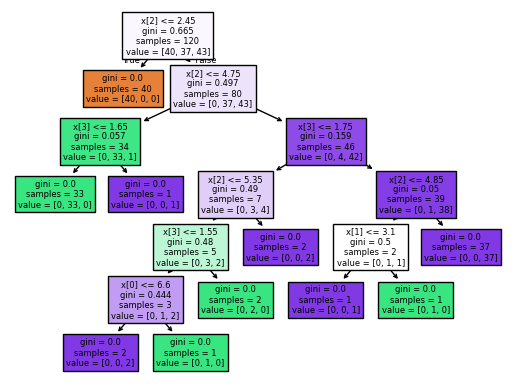

In [31]:
# Visualize the dessesion tree 
from sklearn import tree
plt.Figure(figsize=(15,10))
tree.plot_tree(treeClassifier,filled=True)

In [32]:
y_pred = treeClassifier.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Decision tree classifire Prepruning And Hypreparameter Tuning

In [35]:
param = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2']
}

In [36]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
treemodel = DecisionTreeClassifier()

In [40]:
grid = GridSearchCV(treeClassifier,param_grid=param,cv=5,scoring='accuracy')

In [42]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [43]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [44]:
grid.best_score_

np.float64(0.9416666666666667)

In [45]:
y_pred = grid.predict(x_test)

In [46]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 2])

In [47]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [49]:
score

0.9666666666666667